# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 


Enough about the process, let's get to the content. 

![Text](https://wallpapers.com/images/high/cool-rapper-zs7xat10uqylszmy.webp "Great image choice, Jonas")

Today, we will use network science and Wikipedia to learn about the relationships of **[West Coast](https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians)** and **[East coast](https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians)** rappers. 

To create the network, we will download the Wikipedia pages for all rappers from each coast. Next, we will create the network of the pages that link to each other. Since wikipedia pages link to each other. So [Snoop Dogg](https://en.wikipedia.org/wiki/Snoop_Dogg) links to [Dr. Dre](https://en.wikipedia.org/wiki/Dr._Dre), for example.

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all the rapper-pages from Wikipedia
* Extract all the internal wikipedia-links that connect the rappers on wikipedia
* Generate the network of rappers on wikipedia. 
* Calculate some simple network statistics.

## The Guide to Week 4 (not to be missed)

Today I talk about 

* Results of the user satisfaction questionnaire
* Assignment 1
* Today's exercises

> * ***Video lecture*** Guide to week 4 https://www.dropbox.com/scl/fi/b760tkugfrnm9kca1apnb/GuideToWeek4.mp4?rlkey=r7y6pijkafc9zn5tcz1cmj8dg&dl=0

---

# Prelude: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wikipedia links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?
> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.

In [1]:
import urllib.request

url = 'https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt'
response = urllib.request.urlopen(url)
data = response.read()      # a `bytes` object
text = data.decode('utf-8')
print(text)

Tousled try-hard blog Carles, typewriter fap hella salvia fanny pack selvage mlkshk crucifix. Next level retro quinoa post-ironic. Heirloom keffiyeh synth street art meggings, drinking vinegar Schlitz actually raw denim. 1234 Normcore freegan post-ironic meggings cred, cardigan yr locavore 3 wolf moon. Bitters ennui ugh superpolaroid, artisan scenester distillery kale chips wolf pork belly keffiyeh. Actually Tumblr twee [[drinking vinegar]], squid pickled cronut banh mi taxidermy deep v 8-bit narwhal Odd Future. Sriracha bicycle rights listicle, keffiyeh typewriter authentic selvage cred selfies.

Ugh lo-fi tattooed chambray, DIY Marfa banh mi whatever narwhal jean shorts photo booth keytar listicle. Chambray Truffaut cardigan skateboard, hashtag disrupt next level. Normcore Blue Bottle yr, Odd Future skateboard chillwave iPhone slow-carb sriracha letterpress meditation cronut. IPhone fashion axe Neutra fingerstache tofu gluten-free [[gentrify]], wolf before they sold out pork belly re

In [2]:
import re
pattern = r"\b\d{4}\b"
match = re.findall(pattern, text)
print(match)
for string in match:
    print(string)

['1234', '9999']
1234
9999


In [3]:
import re
string1 = "4586 hello 1234 and 12321 1232 are s1232 or 1232s 3425"
string2 = "134543 hello 2343 and 12321 are s1232 or 1232s"
pattern = r"\b\d{4}\b"
match = re.findall(pattern, string2)
print(match)
for string in match:
    print(string)
match = re.findall(pattern, string1)
print(match)
for string in match:
    print(string)

['2343']
2343
['4586', '1234', '1232', '3425']
4586
1234
1232
3425


> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt).
> 


In [4]:
pattern = r"\bsuper\w+|\bsuper\b"
match = re.findall(pattern, text)
print(match)
for string in match:
    print(string)

['superpolaroid', 'supertaxidermy', 'superbeer']
superpolaroid
supertaxidermy
superbeer


In [5]:
string = "hello supermand are you ssuper or super"
pattern = r"\bsuper\w+|\bsuper\b"
match = re.findall(pattern, string)
print(match)
for string in match:
    print(string)

['supermand', 'super']
supermand
super



Finally, we need to figure out how how to match internal wiki links. Wiki links come in two flavors. They're always enclosed in double square brackets, e.g. `[[wiki-link]]` and can either occur like this:

    ... some text [[Aristotle]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/Aristotle`](https://en.wikipedia.org/wiki/Aristotle). 

The second flavor has two parts, so that links can handle spaces and other more fancy forms of references, here's an example:

    ... some text [[John_McCain|John McCain]] some more text ...

which links to the page [`https://en.wikipedia.org/wiki/John_McCain`](https://en.wikipedia.org/wiki/Eudemus_of_Rhodes). Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the wiki-links from the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2020/master/files/regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [6]:
pattern = r"\[{2}\w+?\]{2}"

match = re.findall(pattern, text)
print(match)
for string in match:
    print(string)


pattern = r'\[{2}\w+?\|.+?\]{2}'

match = re.findall(pattern, text)
print(match)
for string in match:
    print(string)

['[[gentrify]]', '[[hashtag]]']
[[gentrify]]
[[hashtag]]
['[[Bicycle|Bicycle(two-wheeled type)]]', '[[Pitchfork|Pitchfork Magazine]]']
[[Bicycle|Bicycle(two-wheeled type)]]
[[Pitchfork|Pitchfork Magazine]]


In [7]:
pattern = r'\[{2}\w+?\]{2}|\[{2}\w+\|.+?\]{2}'

match = re.findall(pattern, text)
print(match)
for string in match:
    print(string)

['[[gentrify]]', '[[hashtag]]', '[[Bicycle|Bicycle(two-wheeled type)]]', '[[Pitchfork|Pitchfork Magazine]]']
[[gentrify]]
[[hashtag]]
[[Bicycle|Bicycle(two-wheeled type)]]
[[Pitchfork|Pitchfork Magazine]]


In [8]:
pattern = r'\[{2}(.+?)\]{2}'

match = re.findall(pattern, text)
print(match)
for string in match:
    print(string)

['drinking vinegar', 'gentrify', 'hashtag', 'Bicycle|Bicycle(two-wheeled type)', 'Pitchfork|Pitchfork Magazine']
drinking vinegar
gentrify
hashtag
Bicycle|Bicycle(two-wheeled type)
Pitchfork|Pitchfork Magazine


# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package] (https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Wikipedia pages of rappers

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you revisit the [**APIs note book**](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/API_check.ipynb) from that week - it contains lots of useful tips on this specific activity (yes, I had planned this all along!). .

Now, you could first download the names of all the rappers, starting from 

* https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians
* https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians

But this might result in so much pain and suffering that I will not make you do that (although you are very much welcome to try!). Instead, you can download all the names, nice and clean, here (it might still include couple of *noisy* links, but should be fine in 95% of records):
 
* **[West coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestCoastRappers.csv)**
* **[East coast List](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/EastCoastRappers.csv)**

The files contain the wiki-link of all rappers in the two lists above. 


In [9]:
import pandas as pd
df_west = pd.read_csv("../files/WestCoastRappers.csv",index_col=0)
print(df_west)
df_east = pd.read_csv("../files/EastCoastRappers.csv",index_col=0)
print(df_east)

    WikipediaPageName
0           03 Greedo
1            24kGoldn
2            40 Glocc
3     A-Plus (rapper)
4           DJ A-Tron
..                ...
349           Young L
350          Yukmouth
351        Arif Zahir
352          Zealous1
353        Asaiah Ziv

[354 rows x 1 columns]
    WikipediaPageName
0             6ix9ine
1          9th Prince
2                22Gz
3            38 Spesh
4         The 45 King
..                ...
442  Young Music DYMG
443         Younglord
444       Nosson Zand
445         ZillaKami
446       Mike Zombie

[447 rows x 1 columns]


In [10]:
# add a column to each dataframe with the coast name
df_west['Coast'] = 'West'
df_east['Coast'] = 'East'

In [11]:
#concatenate the two dataframes
df = pd.concat([df_west, df_east], ignore_index=True)
print(df)

    WikipediaPageName Coast
0           03 Greedo  West
1            24kGoldn  West
2            40 Glocc  West
3     A-Plus (rapper)  West
4           DJ A-Tron  West
..                ...   ...
796  Young Music DYMG  East
797         Younglord  East
798       Nosson Zand  East
799         ZillaKami  East
800       Mike Zombie  East

[801 rows x 2 columns]


In [12]:
rapper_0 = df['WikipediaPageName'][0]
print(rapper_0)

03 Greedo


---

# Part B: Building the networks

Now, we're going to build one huge NetworkX directed graph, which includes both West-coast and East-coast rappers. 

The nodes in the network will be all the rappers, and we will place an edge between nodes $A$ and $B$ if the Wikipedia page of node $A$ links to the Wikipedia page of node $B$.

 

> ***Video instructions:*** Getting started with rap music. Link: https://www.dropbox.com/scl/fi/ivd99y7tfeqpzj9lxgh0p/GettingStartedWithRapMusic.mp4?rlkey=6y3ye8iex6ogcy93jzyviqlej&dl=0


> 
> _Exercise_: Build the network of rappers 


In [13]:
import requests
baseurl = "https://en.wikipedia.org/w/api.php?"

params = {
    "action": "query",
    "prop": "revisions",
    "rvprop": "content",
    "format": "json",
    "titles": rapper_0
}
wikitext = requests.get(baseurl, params=params)
wikijson = wikitext.json()

In [14]:
text = wikijson['query']['pages']['57205017']['revisions'][0]['*']

In [15]:
pattern = r'\[{2}(.+?)\]{2}'

match = re.findall(pattern, text)
print(match)
for string in match:
    print(string)

['Los Angeles', 'California', 'U.S.', 'West Coast hip hop|West Coast hip-hop', 'Trap music (hip hop)|trap', 'Hip hop music|hip hop', 'Todd Moscowitz|Alamo', 'Rapping|rapper', 'Watts, Los Angeles|Watts', 'Los Angeles, California', 'Grape Street Watts Crips|Grape Street', 'West Los Angeles, California', 'Gardena, California', 'tympanostomy tube', 'Jordan Downs|the Jordan Downs Housing Projects', 'Watts, Los Angeles|Watts', 'Southern hip hop|Southern rap', 'Todd Moscowitz', 'Smokepurpp', 'Lil Pump', 'Lil Uzi Vert', 'Desto Dubb', 'Adam Grandmaison|No Jumper', 'Lil Pump', 'Adam Grandmaison|Adam22', 'Lil Uzi Vert', 'Blink-182', 'Travis Barker', 'Kenny Beats', 'Key Glock', 'Alamo Records', 'Sony Music Entertainment', 'Cannabis (drug)|cannabis', 'methamphetamine', 'Kenny Beats', 'Mike Free', 'Nef the Pharaoh', 'Travis Barker', 'Category:Rappers from Los Angeles', 'Category:1987 births', 'Category:Living people', 'Category:People from Watts, Los Angeles', 'Category:21st-century American rappers

In [16]:
print(match)
for string in match:
    wikilink = string.split('|')[0]
    print(wikilink)

['Los Angeles', 'California', 'U.S.', 'West Coast hip hop|West Coast hip-hop', 'Trap music (hip hop)|trap', 'Hip hop music|hip hop', 'Todd Moscowitz|Alamo', 'Rapping|rapper', 'Watts, Los Angeles|Watts', 'Los Angeles, California', 'Grape Street Watts Crips|Grape Street', 'West Los Angeles, California', 'Gardena, California', 'tympanostomy tube', 'Jordan Downs|the Jordan Downs Housing Projects', 'Watts, Los Angeles|Watts', 'Southern hip hop|Southern rap', 'Todd Moscowitz', 'Smokepurpp', 'Lil Pump', 'Lil Uzi Vert', 'Desto Dubb', 'Adam Grandmaison|No Jumper', 'Lil Pump', 'Adam Grandmaison|Adam22', 'Lil Uzi Vert', 'Blink-182', 'Travis Barker', 'Kenny Beats', 'Key Glock', 'Alamo Records', 'Sony Music Entertainment', 'Cannabis (drug)|cannabis', 'methamphetamine', 'Kenny Beats', 'Mike Free', 'Nef the Pharaoh', 'Travis Barker', 'Category:Rappers from Los Angeles', 'Category:1987 births', 'Category:Living people', 'Category:People from Watts, Los Angeles', 'Category:21st-century American rappers

In [17]:
print(match)
for string in match:
    wikilink = string.split('|')[0]
    if (wikilink in df['WikipediaPageName'].values):
        print(wikilink)

['Los Angeles', 'California', 'U.S.', 'West Coast hip hop|West Coast hip-hop', 'Trap music (hip hop)|trap', 'Hip hop music|hip hop', 'Todd Moscowitz|Alamo', 'Rapping|rapper', 'Watts, Los Angeles|Watts', 'Los Angeles, California', 'Grape Street Watts Crips|Grape Street', 'West Los Angeles, California', 'Gardena, California', 'tympanostomy tube', 'Jordan Downs|the Jordan Downs Housing Projects', 'Watts, Los Angeles|Watts', 'Southern hip hop|Southern rap', 'Todd Moscowitz', 'Smokepurpp', 'Lil Pump', 'Lil Uzi Vert', 'Desto Dubb', 'Adam Grandmaison|No Jumper', 'Lil Pump', 'Adam Grandmaison|Adam22', 'Lil Uzi Vert', 'Blink-182', 'Travis Barker', 'Kenny Beats', 'Key Glock', 'Alamo Records', 'Sony Music Entertainment', 'Cannabis (drug)|cannabis', 'methamphetamine', 'Kenny Beats', 'Mike Free', 'Nef the Pharaoh', 'Travis Barker', 'Category:Rappers from Los Angeles', 'Category:1987 births', 'Category:Living people', 'Category:People from Watts, Los Angeles', 'Category:21st-century American rappers

In [18]:
# initiate a graph with all the rappers
import networkx as nx
G = nx.DiGraph()

for rapper in df['WikipediaPageName']:
    G.add_node(rapper)

print(G.nodes())

['03 Greedo', '24kGoldn', '40 Glocc', 'A-Plus (rapper)', 'DJ A-Tron', 'Ab-Soul', 'Abstract Rude', 'Aceyalone', 'Afroman', 'Ahmad (rapper)', "Ak'Sent", 'The Alchemist (musician)', 'AMG (rapper)', 'Aminé (rapper)', 'Antwon', 'Aztlan Underground', 'B-Legit', 'B-Real', 'B.G. Knocc Out', 'Show Banga', 'Ant Banks', 'Sho Baraka', 'Bavgate', 'Becky G', 'Beeda Weeda', 'Beefy (rapper)', 'Berner (rapper)', 'Big B (rapper)', 'Big Dave (rapper)', 'Big Ed (rapper)', 'Big Fase 100', 'Bizzle', 'Aloe Blacc', 'Black Pegasus', 'Guerilla Black', 'Nissim Black', 'Toni Blackman', 'Blueface', 'Blxst', 'Bones (rapper)', 'Braille (musician)', 'Buddy (rapper)', 'Busdriver', 'Scott Caan', 'Sway Calloway', 'Nick Cannon', "Captain Save 'Em", 'Clyde Carson', 'Celestaphone', 'DJ Cheapshot', 'Tha Chill', 'Shawn Chrystopher', 'Chanel West Coast', 'Conceit (rapper)', 'Coolio', 'Cozz', 'Crooked I', 'Omega Crosby', 'Cut Chemist', 'D-Loc', 'The D.O.C.', 'Daddy X', 'DJ Dahi', 'Dazzie Dee', 'DB Tha General', 'Del the Funky 

In [19]:
pattern = r'\[{2}(.+?)\]{2}'

for i, rapper in enumerate(df['WikipediaPageName']):
    print(i, rapper)

    params = {
        "action": "query",
        "prop": "revisions",
        "rvprop": "content",
        "format": "json",
        "titles": rapper
    }
    wikitext = requests.get(baseurl, params=params)
    wikijson = wikitext.json()
    key = wikijson['query']['pages'].keys()
    text = wikijson['query']['pages'][str(list(key)[0])]['revisions'][0]['*']
    
    match = re.findall(pattern, text)
    for string in match:
        wikilink = string.split('|')[0]
        if (wikilink in df['WikipediaPageName'].values):
            # add directed edge from rapper to wikilink
            G.add_edge(rapper, wikilink)
    

0 03 Greedo
1 24kGoldn
2 40 Glocc
3 A-Plus (rapper)
4 DJ A-Tron
5 Ab-Soul
6 Abstract Rude
7 Aceyalone
8 Afroman
9 Ahmad (rapper)
10 Ak'Sent
11 The Alchemist (musician)
12 AMG (rapper)
13 Aminé (rapper)
14 Antwon
15 Aztlan Underground
16 B-Legit
17 B-Real
18 B.G. Knocc Out
19 Show Banga
20 Ant Banks
21 Sho Baraka
22 Bavgate
23 Becky G
24 Beeda Weeda
25 Beefy (rapper)
26 Berner (rapper)
27 Big B (rapper)
28 Big Dave (rapper)
29 Big Ed (rapper)
30 Big Fase 100
31 Bizzle
32 Aloe Blacc
33 Black Pegasus
34 Guerilla Black
35 Nissim Black
36 Toni Blackman
37 Blueface
38 Blxst
39 Bones (rapper)
40 Braille (musician)
41 Buddy (rapper)
42 Busdriver
43 Scott Caan
44 Sway Calloway
45 Nick Cannon
46 Captain Save 'Em
47 Clyde Carson
48 Celestaphone
49 DJ Cheapshot
50 Tha Chill
51 Shawn Chrystopher
52 Chanel West Coast
53 Conceit (rapper)
54 Coolio
55 Cozz
56 Crooked I
57 Omega Crosby
58 Cut Chemist
59 D-Loc
60 The D.O.C.
61 Daddy X
62 DJ Dahi
63 Dazzie Dee
64 DB Tha General
65 Del the Funky Homosapie

In [20]:
node_sizes = [G.degree(node)+1 for node in G]

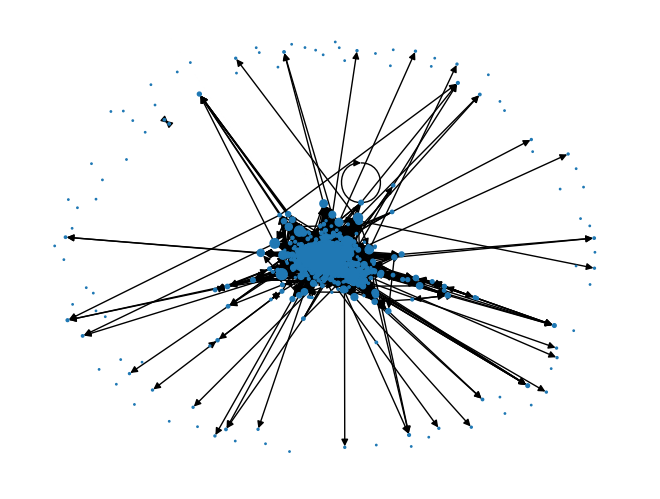

In [21]:
nx.draw(G, node_size=node_sizes, with_labels=False)

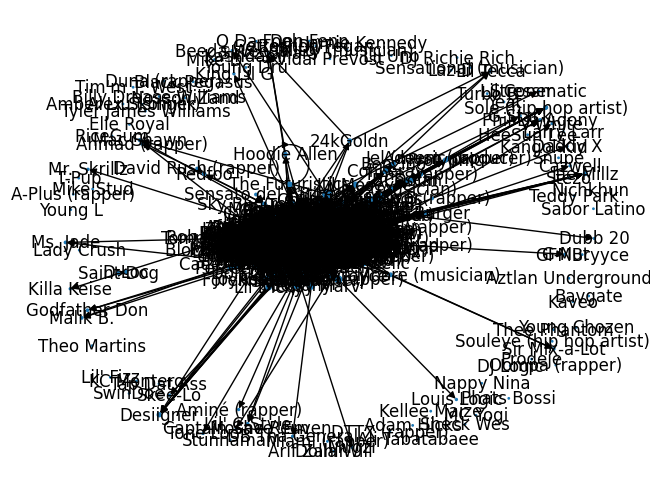

In [22]:
nx.draw(G, node_size=node_sizes, with_labels=True)


> Now we can build the network. Isn't this a little bit cool? What a dataset :)

> The overall strategy for this is the following: 
> Take the pages you have downloaded for each rappers. 
> Each page corresponds to a rapper, which is a node in your network. 
> Find all the hyperlinks in a rapper's page that link to another node of the network (e.g. an other character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include **both** West-coast and East-coast rappers (and that it is possible that some West-coast rappers will have links to East-coast rappers and vice-versa).
> 
> **Note**: When you add a node to the network, also include an `attribute` (i.e. that specifies the universe where the character comes from; either West coast, or East coast)
>
>
> * Use a regular expression to extract all outgoing links from each of the pages you downloaded above. 
> * For each link you extract, check if the target is a rapper. If yes, keep it. If no, discard it.
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. which coast they represent).
> * When have you finished, you'll notice that some nodes do not have any out- or in- degrees. You may *discard* those from the network.


In [23]:
G = nx.DiGraph()

for i in df.index:
    G.add_node(df['WikipediaPageName'][i], coast=df['Coast'][i])

print(G.nodes(data=True))

[('03 Greedo', {'coast': 'West'}), ('24kGoldn', {'coast': 'West'}), ('40 Glocc', {'coast': 'West'}), ('A-Plus (rapper)', {'coast': 'West'}), ('DJ A-Tron', {'coast': 'West'}), ('Ab-Soul', {'coast': 'West'}), ('Abstract Rude', {'coast': 'West'}), ('Aceyalone', {'coast': 'West'}), ('Afroman', {'coast': 'West'}), ('Ahmad (rapper)', {'coast': 'West'}), ("Ak'Sent", {'coast': 'West'}), ('The Alchemist (musician)', {'coast': 'West'}), ('AMG (rapper)', {'coast': 'West'}), ('Aminé (rapper)', {'coast': 'West'}), ('Antwon', {'coast': 'West'}), ('Aztlan Underground', {'coast': 'West'}), ('B-Legit', {'coast': 'West'}), ('B-Real', {'coast': 'West'}), ('B.G. Knocc Out', {'coast': 'West'}), ('Show Banga', {'coast': 'West'}), ('Ant Banks', {'coast': 'West'}), ('Sho Baraka', {'coast': 'West'}), ('Bavgate', {'coast': 'West'}), ('Becky G', {'coast': 'West'}), ('Beeda Weeda', {'coast': 'West'}), ('Beefy (rapper)', {'coast': 'West'}), ('Berner (rapper)', {'coast': 'West'}), ('Big B (rapper)', {'coast': 'West

In [24]:
pattern = r'\[{2}(.+?)\]{2}'

for i, rapper in enumerate(df['WikipediaPageName']):
    print(i, rapper)

    params = {
        "action": "query",
        "prop": "revisions",
        "rvprop": "content",
        "format": "json",
        "titles": rapper
    }
    wikitext = requests.get(baseurl, params=params)
    wikijson = wikitext.json()
    key = wikijson['query']['pages'].keys()
    text = wikijson['query']['pages'][str(list(key)[0])]['revisions'][0]['*']
    
    match = re.findall(pattern, text)
    for string in match:
        wikilink = string.split('|')[0]
        if (wikilink in df['WikipediaPageName'].values):
            # add directed edge from rapper to wikilink
            G.add_edge(rapper, wikilink)
    

0 03 Greedo
1 24kGoldn
2 40 Glocc
3 A-Plus (rapper)
4 DJ A-Tron
5 Ab-Soul
6 Abstract Rude
7 Aceyalone
8 Afroman
9 Ahmad (rapper)
10 Ak'Sent
11 The Alchemist (musician)
12 AMG (rapper)
13 Aminé (rapper)
14 Antwon
15 Aztlan Underground
16 B-Legit
17 B-Real
18 B.G. Knocc Out
19 Show Banga
20 Ant Banks
21 Sho Baraka
22 Bavgate
23 Becky G
24 Beeda Weeda
25 Beefy (rapper)
26 Berner (rapper)
27 Big B (rapper)
28 Big Dave (rapper)
29 Big Ed (rapper)
30 Big Fase 100
31 Bizzle
32 Aloe Blacc
33 Black Pegasus
34 Guerilla Black
35 Nissim Black
36 Toni Blackman
37 Blueface
38 Blxst
39 Bones (rapper)
40 Braille (musician)
41 Buddy (rapper)
42 Busdriver
43 Scott Caan
44 Sway Calloway
45 Nick Cannon
46 Captain Save 'Em
47 Clyde Carson
48 Celestaphone
49 DJ Cheapshot
50 Tha Chill
51 Shawn Chrystopher
52 Chanel West Coast
53 Conceit (rapper)
54 Coolio
55 Cozz
56 Crooked I
57 Omega Crosby
58 Cut Chemist
59 D-Loc
60 The D.O.C.
61 Daddy X
62 DJ Dahi
63 Dazzie Dee
64 DB Tha General
65 Del the Funky Homosapie

In [25]:
print(len(G.nodes()))
# remove nodes with degree 0
for node in G.copy().nodes():
    if G.in_degree(node) == 0 and G.out_degree(node) == 0:
        G.remove_node(node)
print(len(G.nodes()))

798
730


In [26]:
print(len(G.edges()))

5811


In [27]:
node_sizes = [G.degree(node)+1 for node in G]

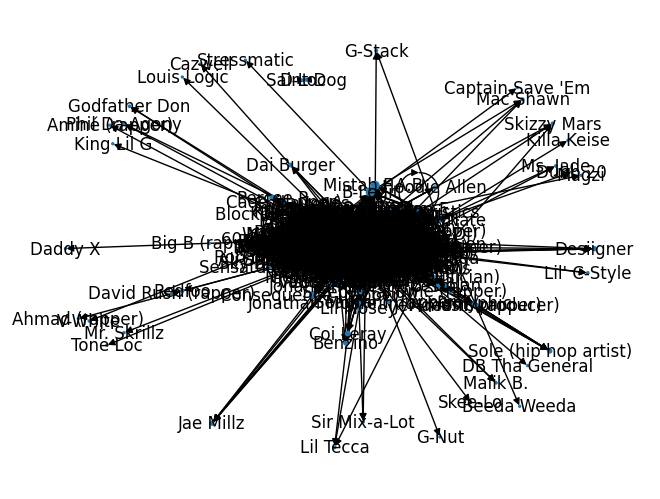

In [28]:
nx.draw(G, node_size=node_sizes, with_labels=True)

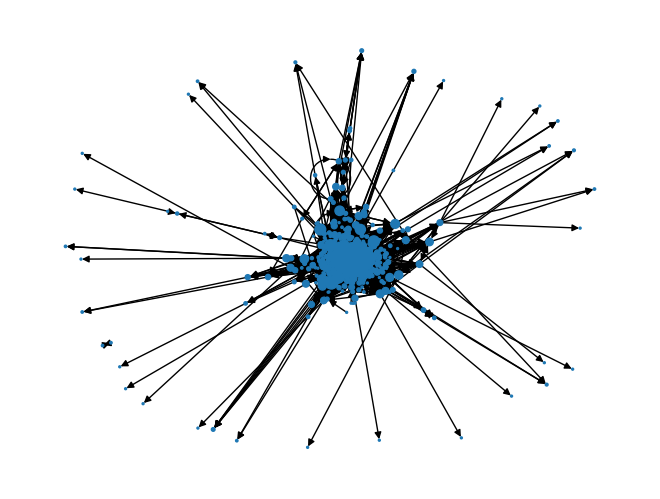

In [29]:
nx.draw(G, node_size=node_sizes)

In [30]:
colors = ['red' if G.nodes[node]['coast']=='West' else 'blue' for node in G]

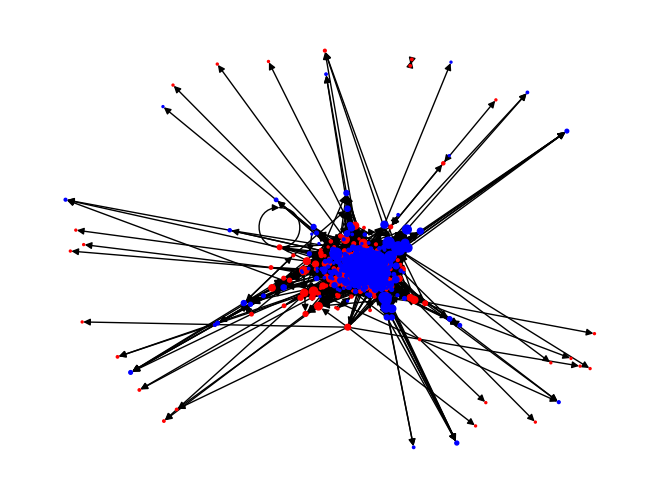

In [31]:
nx.draw(G, node_size=node_sizes, node_color=colors)


> *Exercise*: Simple network statistics and analysis

> * What is the number of nodes in the network? 
> * More importantly, what is the number of links?

In [32]:
N = len(G.nodes())
L = len(G.edges())
print(f'number of nodes: {N}')
print(f'number of edges: {L}')


number of nodes: 730
number of edges: 5811


> * What is the number of links connecting West coast and East coast? What do those links mean?


In [33]:
# count number of links between the two coasts
count = 0
for edge in G.edges():
    if G.nodes[edge[0]]['coast'] != G.nodes[edge[1]]['coast']:
        count += 1
print(f'number of links between the two coasts: {count}')


number of links between the two coasts: 1260


In [34]:
# count number of links from west to east
count_w = 0
for edge in G.edges():
    if G.nodes[edge[0]]['coast'] == 'West' and G.nodes[edge[1]]['coast'] == 'East':
        count_w += 1
print(f'number of links from west to east: {count_w}')

# count number of links from east to west
count_e = 0
for edge in G.edges():
    if G.nodes[edge[0]]['coast'] == 'East' and G.nodes[edge[1]]['coast'] == 'West':
        count_e += 1
print(f'number of links from east to west: {count_e}')
print(f'number of links between the two coasts: {count_w+count_e}')


number of links from west to east: 643
number of links from east to west: 617
number of links between the two coasts: 1260


> * Plot the in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?


127
0
730


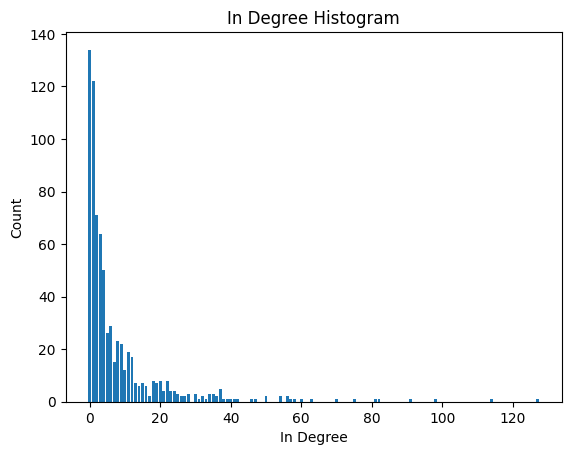

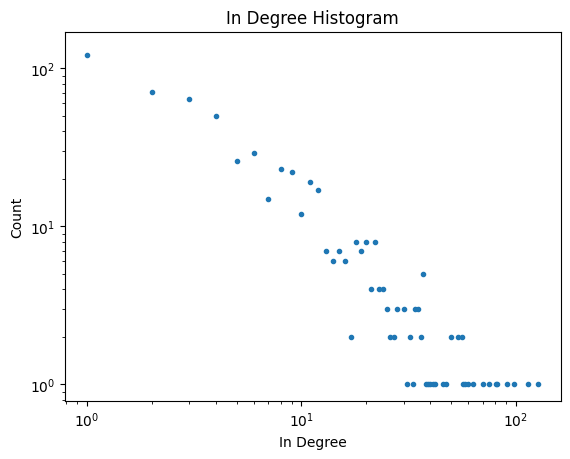

In [42]:
import numpy as np
import matplotlib.pyplot as plt

k_in = [d for n, d in G.in_degree()] 
max_k_in = np.max(k_in)
min_k_in = np.min(k_in)
print(max_k_in)
print(min_k_in)
v = np.arange(min_k_in,max_k_in+2)

counts, bins = np.histogram(k_in, bins=v)
sum_counts = np.sum(counts)
print(sum_counts)

plt.bar(bins[:-1], counts)

plt.title("In Degree Histogram")
plt.ylabel("Count")
plt.xlabel("In Degree")
plt.show()

plt.loglog(bins[:-1], counts,'.')

plt.title("In Degree Histogram")
plt.ylabel("Count")
plt.xlabel("In Degree")
plt.show()


52
0
730


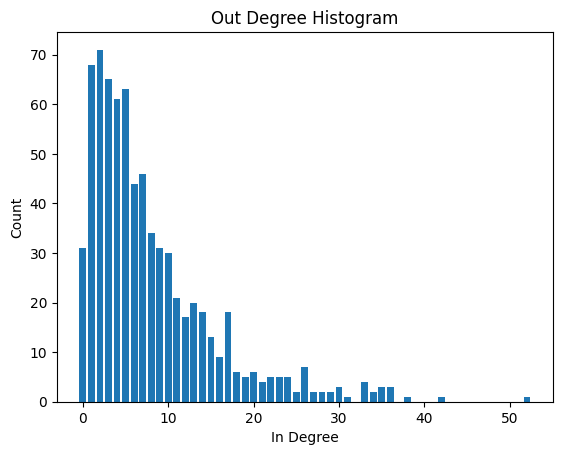

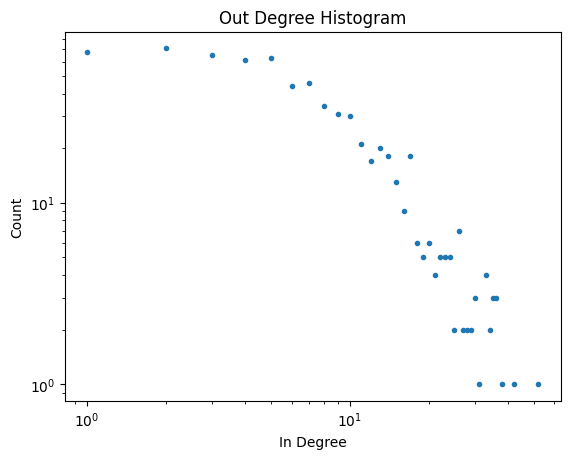

In [43]:
import numpy as np
import matplotlib.pyplot as plt

k_out = [d for n, d in G.out_degree()] 
max_k_out = np.max(k_out)
min_k_out = np.min(k_out)
print(max_k_out)
print(min_k_out)
v = np.arange(min_k_out,max_k_out+2)

counts, bins = np.histogram(k_out, bins=v)
sum_counts = np.sum(counts)
print(sum_counts)

plt.bar(bins[:-1], counts)

plt.title("Out Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Out Degree")
plt.show()


plt.loglog(bins[:-1], counts, '.')

plt.title("Out Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Out Degree")
plt.show()

127
0
1460


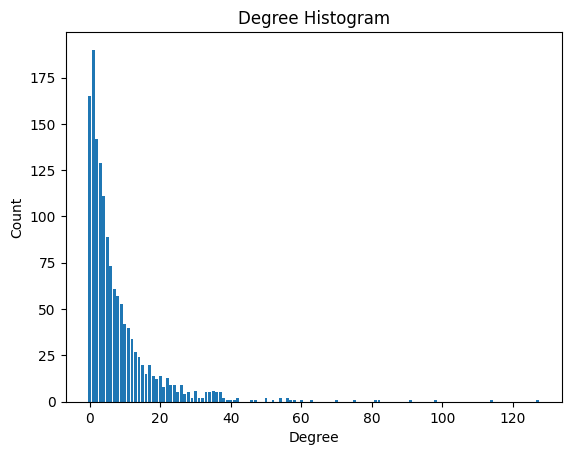

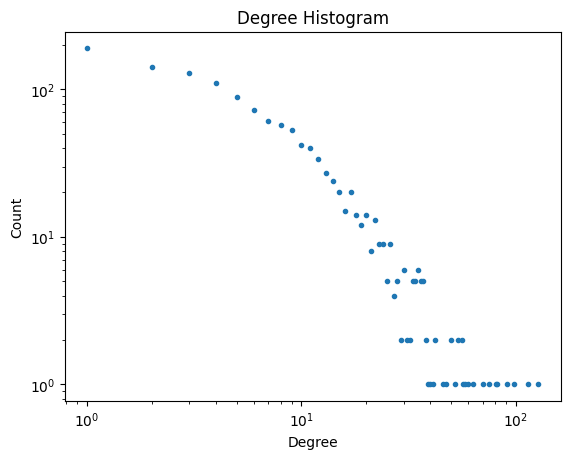

In [46]:
import numpy as np
import matplotlib.pyplot as plt

k = k_in + k_out
max_k = np.max(k)
min_k = np.min(k)
print(max_k)
print(min_k)
v = np.arange(min_k,max_k+2)

counts, bins = np.histogram(k, bins=v)
sum_counts = np.sum(counts)
print(sum_counts)

plt.bar(bins[:-1], counts)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()


plt.loglog(bins[:-1], counts, '.')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below:
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees.png?raw=true)
![img](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/WestcoastvsEastcoast_degrees_loglog.png?raw=true)


> * Compare the degree distribution to a *random network* with the same number of nodes and *p*


In [44]:
avg_k = L/N
avg_k_in = np.mean(k_in)
avg_k_out = np.mean(k_out)
print(avg_k)
print(avg_k_in)
print(avg_k_out)
p = avg_k/(N-1)
G_ER = nx.erdos_renyi_graph(N, p, directed=True)

7.96027397260274
7.96027397260274
7.96027397260274


19
1
1460


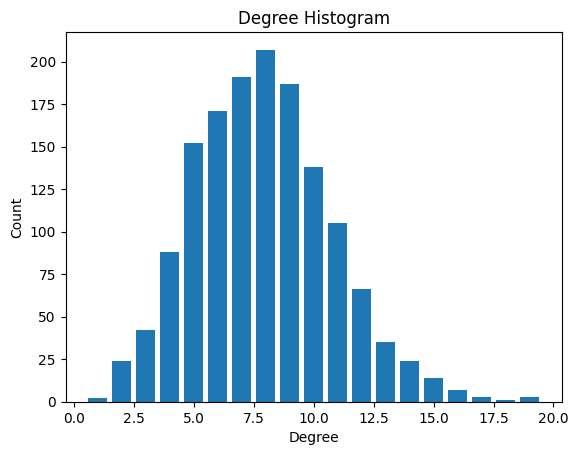

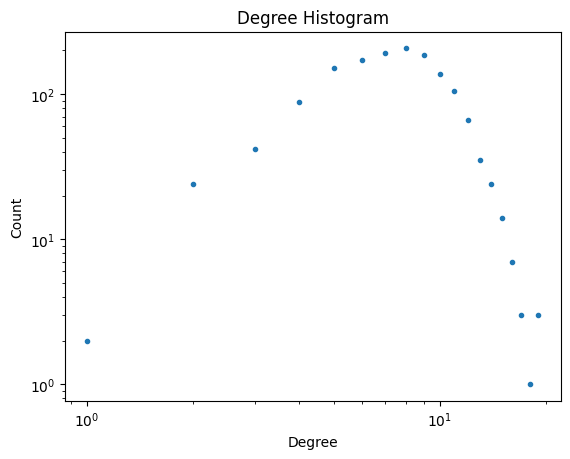

In [47]:
import numpy as np
import matplotlib.pyplot as plt

k_out = [d for n, d in G_ER.out_degree()] 
k_in = [d for n, d in G_ER.in_degree()] 

k = k_in + k_out
max_k = np.max(k)
min_k = np.min(k)
print(max_k)
print(min_k)
v = np.arange(min_k,max_k+2)

counts, bins = np.histogram(k, bins=v)
sum_counts = np.sum(counts)
print(sum_counts)

plt.bar(bins[:-1], counts)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()


plt.loglog(bins[:-1], counts, '.')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

> * Compare the degree distribution to a *scale-free* network with the same number of nodes.


In [50]:
import random
G_BA = nx.DiGraph()
G_BA.add_edges_from([(1,2)])
l = [1,2]
for i in range(3,N+1):
    j = random.choice(l)
    G_BA.add_edge(i,j)
    l.append(i)
    l.append(j)

61
0
1460


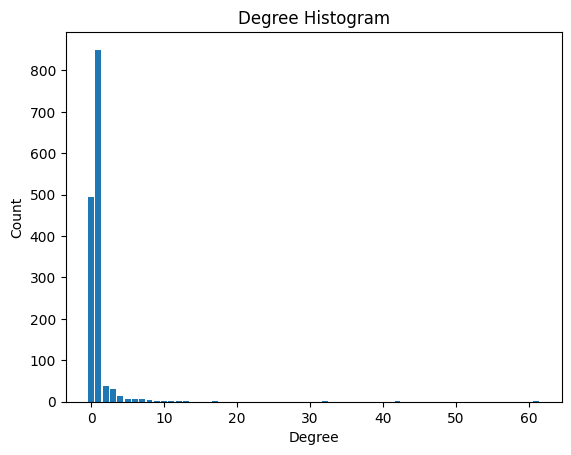

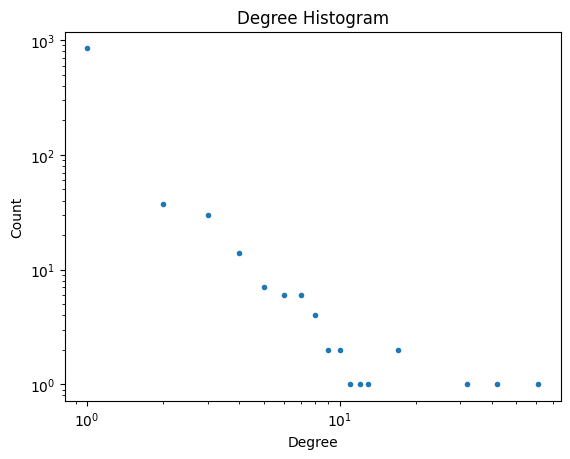

In [51]:
import numpy as np
import matplotlib.pyplot as plt

k_out = [d for n, d in G_BA.out_degree()] 
k_in = [d for n, d in G_BA.in_degree()] 

k = k_in + k_out
max_k = np.max(k)
min_k = np.min(k)
print(max_k)
print(min_k)
v = np.arange(min_k,max_k+2)

counts, bins = np.histogram(k, bins=v)
sum_counts = np.sum(counts)
print(sum_counts)

plt.bar(bins[:-1], counts)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()


plt.loglog(bins[:-1], counts, '.')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

> * Who are top 10 most connected rappers? (Report results for in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected West coast rappers (again in terms of both in/out-degree)?
> * Who are the top 5 most connected East coast rappers (again in terms of both in/out-degree)?

In [63]:
# find the top 10 most connected nodes
top10_in = sorted(G.in_degree, key=lambda x: x[1], reverse=True)[:10]
print(top10_in)
top10_out = sorted(G.out_degree, key=lambda x: x[1], reverse=True)[:10]
print(top10_out)

colors = ['red' if G.nodes[node]['coast']=='West' else 'blue' for node in G]

sorted_in = sorted(G.in_degree, key=lambda x: x[1], reverse=True)
sorted_out = sorted(G.out_degree, key=lambda x: x[1], reverse=True)

top5_west_in = [node for node in sorted_in if G.nodes[node[0]]['coast']=='West'][:5]
print(top5_west_in)

top5_west_out = [node for node in sorted_out if G.nodes[node[0]]['coast']=='West'][:5]
print(top5_west_out)

top5_east_in = [node for node in sorted_in if G.nodes[node[0]]['coast']=='East'][:5]
print(top5_east_in)

top5_east_out = [node for node in sorted_out if G.nodes[node[0]]['coast']=='East'][:5]
print(top5_east_out)

[('Snoop Dogg', 127), ('Jay-Z', 114), ('Nas', 98), ('50 Cent', 91), ('Busta Rhymes', 82), ('Dr. Dre', 81), ('Kendrick Lamar', 75), ('Tupac Shakur', 70), ('The Notorious B.I.G.', 63), ('E-40', 60)]
[('Drag-On', 52), ('Black Thought', 42), ('DJ Dahi', 38), ('Dr. Dre', 36), ('The Game (rapper)', 36), ('Kendrick Lamar', 36), ('Kurupt', 35), ('Jahlil Beats', 35), ('MC Lyte', 35), ('Uncle Murda', 34)]
[('Snoop Dogg', 127), ('Dr. Dre', 81), ('Kendrick Lamar', 75), ('Tupac Shakur', 70), ('E-40', 60)]
[('DJ Dahi', 38), ('Dr. Dre', 36), ('The Game (rapper)', 36), ('Kendrick Lamar', 36), ('Kurupt', 35)]
[('Jay-Z', 114), ('Nas', 98), ('50 Cent', 91), ('Busta Rhymes', 82), ('The Notorious B.I.G.', 63)]
[('Drag-On', 52), ('Black Thought', 42), ('Jahlil Beats', 35), ('MC Lyte', 35), ('Uncle Murda', 34)]
